#  Exploratory Data Analysis of Aphex Twin's Music Using Spotify Metrics
# AKA understanding Spotify Metrics through the Music of Aphex Twin


This notebook analyzes Aphex Twin’s music using Spotify’s audio features. It explores various metrics, such as energy, Valence and Danceability, to understand their relationship with track characteristics and popularity.

The analysis involves calculating custom "Bangerness" and "Ambientness" scores to assess track intensity and atmosphere. Additionally, the analysis examines how features such as energy and acousticness correlate with track popularity.



The initial dataset was compiled using Spotify's API, covering all available Aphex Twin tracks and their associated features. [The code used to generate this dataset can be found here](https://github.com/iftah-og/afx_eda/blob/main/spot_to_df.ipynb).

In [2]:
# Import necessary stuff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
# Load the dataset from the specified URL 
url = 'https://raw.githubusercontent.com/iftah-og/afx_eda/main/afx_c.csv'
df = pd.read_csv(url)
print('df shape is', df.shape)
df.head()

df shape is (118, 18)


,Unnamed: 0,Track Name,Album Name,Track ID,Popularity,Tempo (BPM),Duration (s),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Release Date
0,0,Digeridoo - 2022 Remaster,Digeridoo (Expanded Edition),2Fh8MjqWLFCoiOOHQRfqgq,40,146.092,432.938,0.519,0.977,10,-8.057,0,0.0544,0.774000,0.855,0.114,0.568,2024-05-31
1,1,Flap Head - 2022 Remaster,Digeridoo (Expanded Edition),24nMZbhkJNqJ70P1J81ZNx,35,136.244,420.766,0.566,0.995,1,-7.022,1,0.0503,0.151000,0.886,0.399,0.592,2024-05-31
2,2,Phloam - 2022 Remaster,Digeridoo (Expanded Edition),2jft0p7lZNXkKksCFHbsKr,32,135.880,333.535,0.525,0.977,10,-8.163,0,0.1310,0.000882,0.440,0.145,0.238,2024-05-31
3,3,Isoprophlex - 2022 Remaster,Digeridoo (Expanded Edition),1U3W1jTqreI3YL84sA1eCx,30,135.609,383.964,0.646,0.914,1,-9.003,0,0.0730,0.234000,0.768,0.039,0.339,2024-05-31
4,4,Digeridoo - Cr7E Version,Digeridoo (Expanded Edition),2Ujum3PkQL0x3QMnGoJGPf,34,142.844,445.314,0.533,0.972,7,-8.425,1,0.0521,0.765000,0.906,0.123,0.415,2024-05-31


## Danceability: is the sole presence of drums enough?

The first thing I wanted to explore was how "Danceability" translates into real-life listening. According to spotify, *"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."* I sorted the data frame to highlight the most danceable tracks according to Spotify's metrics, and the results were surprising. For instance, I've always appreciated the eerie vibe of **[#8](https://www.youtube.com/watch?v=EBT7KU-WHco)**, but is it really the most danceable track? While danceability is subjective, most people i know wouldn't rank it anywhere near the top. As the initial description suggests, Spotify calculates "Danceability" based on the repetition of patterns throughout a track—and if you know the track in question, you're familiar with the relentless short analog drum loop that never stop. The next track on the list, **[Cow Cud Is A Twin](https://www.youtube.com/watch?v=yETFMyqxR2I)** further supports this idea. Just listen to it — again, there's a repetitive drum loop running throughout the entire track
But does the presence of a drum beat alone make a piece of music genuinely danceable? 

In [4]:
df_dance_pos = df.sort_values(['Danceability'], ascending=False).head()
df_dance_pos [['Album Name', 'Track Name', 'Danceability', 'Tempo (BPM)']]

,Album Name,Track Name,Danceability,Tempo (BPM)
88,Selected Ambient Works Volume II,#8,0.942,112.947
79,...I Care Because You Do,Cow Cud Is A Twin,0.851,79.002
14,Syro,180db_ [130],0.828,130.064
24,Drukqs,Kladfvgbung Mischk,0.816,129.984
12,Syro,produk 29 [101],0.815,101.005


however, Danceability seems to do a good job on the other side of the spectrum, tracks with extreme low Danceability are rather on the ambient side.

In [5]:
df_dance_neg = df.sort_values(['Danceability'], ascending=True).head()
df_dance_neg [['Album Name', 'Track Name', 'Danceability', 'Tempo (BPM)']]

,Album Name,Track Name,Danceability,Tempo (BPM)
102,Selected Ambient Works Volume II,#22,0.064,76.311
90,Selected Ambient Works Volume II,#10,0.105,66.738
100,Selected Ambient Works Volume II,#20,0.108,69.511
80,...I Care Because You Do,Next Heap With,0.109,76.229
94,Selected Ambient Works Volume II,#14,0.124,153.964


## How about the Energy?
Next, I wanted to explore the "Energy" metric. Spotify tells us that it is "*a measure from 0.0 to 1.0 and is comprised from dynamic range, perceived loudness, timbre, onset rate, and general entropy."* Here, too, the results were a bit mixed. For instance, **[Hedphelym](https://www.youtube.com/watch?v=ztKgEnidFUA)** from **Selected Ambient Works 85-92** is a track I really love, and while it does have a certain level of energy, I would personally categorize it more on the ambient side.

In [6]:
df_energy = df.sort_values(['Energy'], ascending=False).head()
df_energy[['Album Name', 'Track Name', 'Energy', 'Tempo (BPM)']]

,Album Name,Track Name,Energy,Tempo (BPM)
115,Selected Ambient Works 85-92,Hedphelym,0.999,124.915
63,Richard D. James Album,Carn Marth,0.997,166.895
1,Digeridoo (Expanded Edition),Flap Head - 2022 Remaster,0.995,136.244
74,...I Care Because You Do,Come On You Slags,0.995,89.614
9,Digeridoo (Expanded Edition),Flap Head - Cr7E Version,0.994,121.014


## Valence: Unexpected Positivity
Spotify's "Valence" metric measures how positive or happy a track sounds, with scores ranging from 0.0 to 1.0. Lower scores supposedly mean the track sounds sad or angry, while higher scores mean it sounds happy or cheerful.
The results for valence are interesting. I get why **[Funny Little Man](https://www.youtube.com/watch?v=aM5ThfUyjEQ)** scores high—it’s weird and fun—but it’s surprising to see **[Bbydhyonchord](https://www.youtube.com/watch?v=IYKajhHfL4Q)** next, as I've always found it more introspective and pensive.

In [7]:
df_valence = df.sort_values(['Valence'], ascending=False).head()
df_valence[['Album Name', 'Track Name', 'Valence', 'Tempo (BPM)']] 

,Album Name,Track Name,Valence,Tempo (BPM)
56,Come To Daddy,Funny Little Man,0.886,132.953
28,Drukqs,Bbydhyonchord,0.883,122.973
69,...I Care Because You Do,Acrid Avid Jam Shred,0.796,80.938
62,Richard D. James Album,Fingerbib,0.787,131.910
20,Syro,s950tx16wasr10 [163.97][earth portal mix],0.743,163.990


# Feature Engineering
The initial metrics provided were somewhat useful but didn't fully capture the characteristics I was interested in. To address this, I decided to create two new features.

**Bangerness** should measures how likely a track is to be banging in  a club setting, focusing on high energy and strong beats. It aims to identify tracks that are particularly suited for a intensive, dance-focused environment.

**Ambientness** should evaluates how soothing and ambient a track is. It considers factors like low energy and high acousticness to determine how calming and atmospheric a track might be.

## Exploring correlation with a heatmap

I started with a heatmap to uncover relationships between track features. This approach reveals correlations between aspects like valence and danceability, which is essential for feature engineering. Knowing these relationships helps in selecting and combining features effectively to capture the music's characteristics.


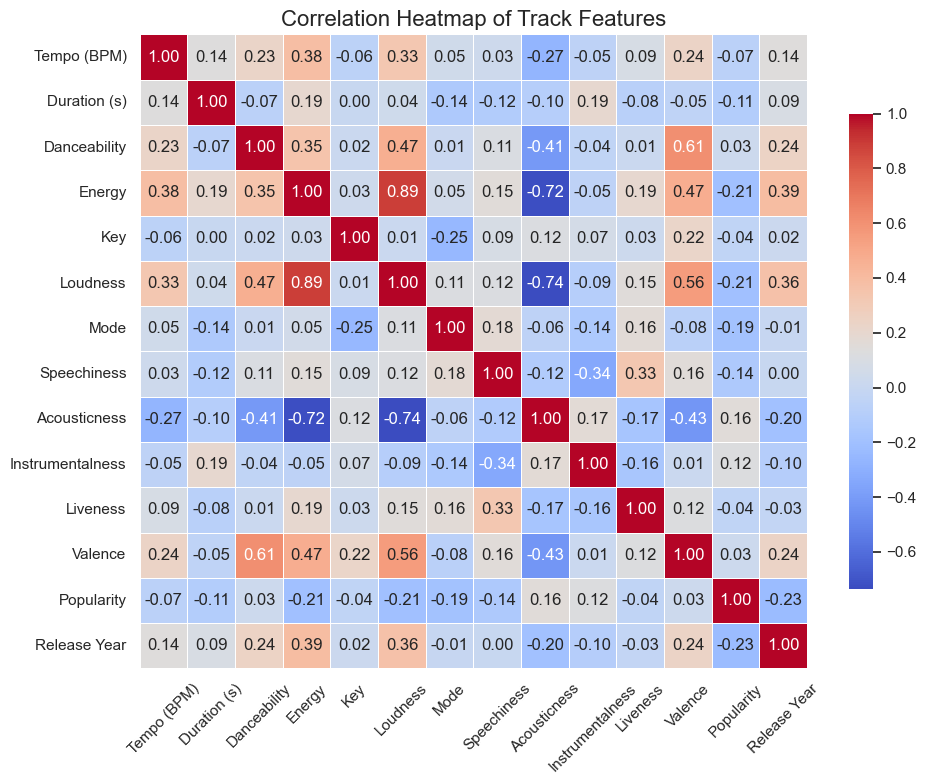

In [8]:
# Convert 'Release Date' to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d', errors='coerce')

# Extract year
df['Release Year'] = df['Release Date'].dt.year

# Define numeric columns
numeric_cols = ['Tempo (BPM)', 'Duration (s)', 'Danceability', 'Energy', 
                'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 
                'Instrumentalness', 'Liveness', 'Valence', 'Popularity', 'Release Year']

# Convert to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Set plot style
sns.set(style='white')

# Compute and plot correlation matrix
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap of Track Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


As we can see in the heatmap above, certain patterns immediately stand out. For example, there is a very strong relationship between loudness and energy (which is not surprising, as Spotify indicates that loudness is one of the features used to measure energy), as well as between valence and danceability. Additionally, there is a very strong negative relationship between energy, acousticness, and loudness.

What also stands out is the moderate correlation between release year and loudness. There are two reasons for this: firstly, releases after 2014 tend to be less ambient, and secondly, if you have been in the audio world for a while, you might be familiar with the term "The loudness war."

The plot below shows a moderate yet clear trend. We need to factor this in when calculating "Bangerness" to ensure our results reflect the data correctly. Since loudness is used to calculate energy, this could make newer releases seem more "banging.

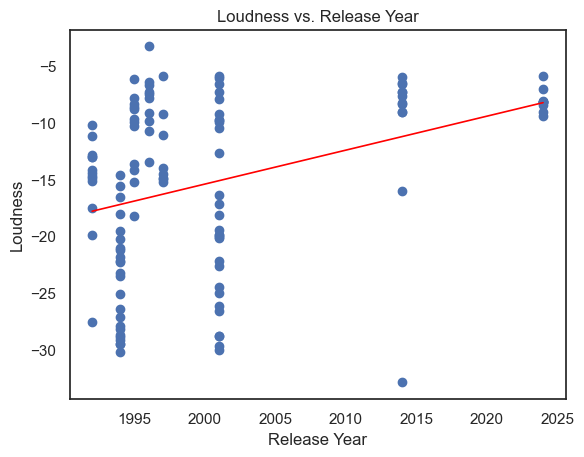

In [9]:
df['Release Year'] = df['Release Date'].dt.year

#Prepare and Fit
X = df[['Release Year']].dropna()  
y = df['Loudness'].dropna()  

model = LinearRegression()
model.fit(X, y)

# Plot points
plt.scatter(X, y, label='Data Points')

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=1.2)

plt.xlabel('Release Year')
plt.ylabel('Loudness')
plt.title('Loudness vs. Release Year')
plt.show()

# Calculating Bangerness

To calculate "Bangerness," I use energy, valence, danceability, and negative acousticness. Loudness is adjusted to have more influence on older tracks. I apply intuitive weights to these factors based on insights gained from the dataset. The calculation is:

**Bangerness = (3.6×Energy) + (0.1×Valence) + (0.6×Danceability) + (0.1×AdjustedLoudnessWeight×Loudness) − (0.2×Acousticness)**



In [10]:
# Convert and normalize 'Release Date'
df['Release Date Numeric'] = df['Release Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NA)
df['ReleaseDateNorm'] = (df['Release Date Numeric'] - df['Release Date Numeric'].min()) / (df['Release Date Numeric'].max() - df['Release Date Numeric'].min())

# Adjust Loudness weight
df['AdjustedLoudnessWeight'] = 1 - df['ReleaseDateNorm']

# Calculate Bangerness 
df['Bangerness'] = (3.6 * df['Energy'] +
                    0.1 * df['Valence'] +
                    0.6 * df['Danceability'] +
                    0.1 * df['AdjustedLoudnessWeight'] * df['Loudness']) - 0.2 * df['Acousticness']

# Normalize 
df['Bangerness'] = (df['Bangerness'] - df['Bangerness'].min()) / (df['Bangerness'].max() - df['Bangerness'].min())

# Sort and clean 
df_sorted = df.sort_values(['Bangerness'], ascending=False)
df_sorted = df_sorted.drop(columns=['ReleaseDateNorm', 'AdjustedLoudnessWeight', 'Release Date Numeric'])

# Remove duplicates
df_sorted['First Word'] = df_sorted['Track Name'].str.split().str[0]
df_sorted_unique = df_sorted.drop_duplicates(subset='First Word', keep='first')
df_sorted_unique = df_sorted_unique.drop(columns=['First Word'])

# Show top 10 tracks
df_sorted_unique[['Album Name','Track Name', 'Popularity',  
            'Danceability','Release Date', 'Bangerness']].head(10)

,Album Name,Track Name,Popularity,Danceability,Release Date,Bangerness
9,Digeridoo (Expanded Edition),Flap Head - Cr7E Version,24,0.675,2024-05-31,1.000000
7,Digeridoo (Expanded Edition),Phloam - Cr7E Version,24,0.536,2024-05-31,0.979356
5,Digeridoo (Expanded Edition),"Digeridoo - Cr7E Version, Live In Cornwall",26,0.525,2024-05-31,0.968315
63,Richard D. James Album,Carn Marth,34,0.599,1996-11-04,0.957530
17,Syro,CIRCLONT14 [152.97][shrymoming mix],34,0.671,2014-09-22,0.949845
3,Digeridoo (Expanded Edition),Isoprophlex - 2022 Remaster,30,0.646,2024-05-31,0.949663
20,Syro,s950tx16wasr10 [163.97][earth portal mix],36,0.686,2014-09-22,0.937644
19,Syro,PAPAT4 [155][pineal mix],34,0.668,2014-09-22,0.922267
36,Drukqs,54 Cymru Beats,35,0.632,2001-10-22,0.921096
23,Drukqs,Vordhosbn,44,0.662,2001-10-22,0.916346


Above, you can find the top 10 tracks with the highest "Bangerness" score according to my calculation. Here's a link to the playlist:

Listen to the Playlist

# Popularity

The analysis below shows a slight decline in popularity as the "Bangerness" score increases. Although the Mean Squared Error of 90.05 suggests a high level of prediction error, the overall trend still offers useful insight. It indicates that tracks with higher "Bangerness" don’t always become more popular. This aligns with my hunch that Spotify is often used for background music, which might explain why more energetic or demanding tracks aren’t as popular. (Can you imagine something like **[Phloam](https://www.youtube.com/watch?v=k034En2FVoo)** being featured in a playlist called "10 Tracks to Study and Focus On a Rainy Day"?)

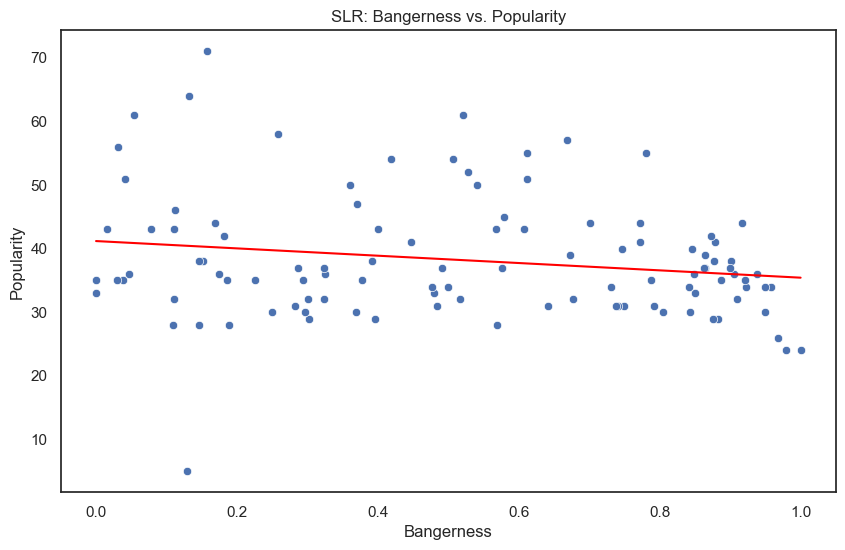

Coefficient (Slope): -5.754513340651884
Intercept: 41.17276479921264
Mean Squared Error (MSE): 90.05093730462856


In [19]:
# Reshape data for SLR
X = df_sorted_unique[['Bangerness']].values.reshape(-1, 1)  # Bangerness as predictor
y = df_sorted_unique['Popularity'].values  # Popularity as target

# Perform SLR
model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bangerness', y='Popularity', data=df_sorted_unique)
plt.plot(df_sorted_unique['Bangerness'], y_pred, color='red', label='Regression Line')
plt.title('SLR: Bangerness vs. Popularity')
plt.xlabel('Bangerness')
plt.ylabel('Popularity')
plt.show()

#SLR results
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {np.mean((y_pred - y) ** 2)}")

I want to confirm my hunch by looking into the most popular tracks. As shown below, my assumption seems to hold up, with tracks like "QKThr," "Avril 14th," and "rhubarb (#3)" leading the list. It’s likely that these tracks found their way into a large number of playlists, which in turn contributed to their popularity.

In [20]:
df_sorted = df.sort_values(['Popularity'], ascending=False)
df_sorted.head(10)
df_sorted[['Album Name','Track Name', 'Popularity',  
            'Danceability','Release Date', 'Bangerness']].head(10)

,Album Name,Track Name,Popularity,Danceability,Release Date,Bangerness
39,Drukqs,QKThr,71,0.451,2001-10-22,0.156822
30,Drukqs,Avril 14th,64,0.558,2001-10-22,0.132297
105,Selected Ambient Works 85-92,Xtal,61,0.510,1992-02-10,0.521199
83,Selected Ambient Works Volume II,#3,61,0.159,1994-03-07,0.053873
21,Syro,aisatsana [102],58,0.260,2014-09-22,0.258259
52,Come To Daddy,Flim,57,0.710,1997-10-06,0.668602
109,Selected Ambient Works 85-92,I,56,0.183,1992-02-10,0.031016
78,...I Care Because You Do,Alberto Balsalm,55,0.791,1995-04-24,0.612349
14,Syro,180db_ [130],55,0.828,2014-09-22,0.780980
107,Selected Ambient Works 85-92,Pulsewidth,54,0.765,1992-02-10,0.507184


# What makes it popular?


I wanted to analyze some features of the top 10 tracks to see if there are any patterns. So, I plotted Energy, Acousticness, Instrumentalness, and Speechiness against Popularity. The graph shows that these top tracks generally have low energy, high acousticness and high instrumentalness. Danceability, however, shows more mixed results.

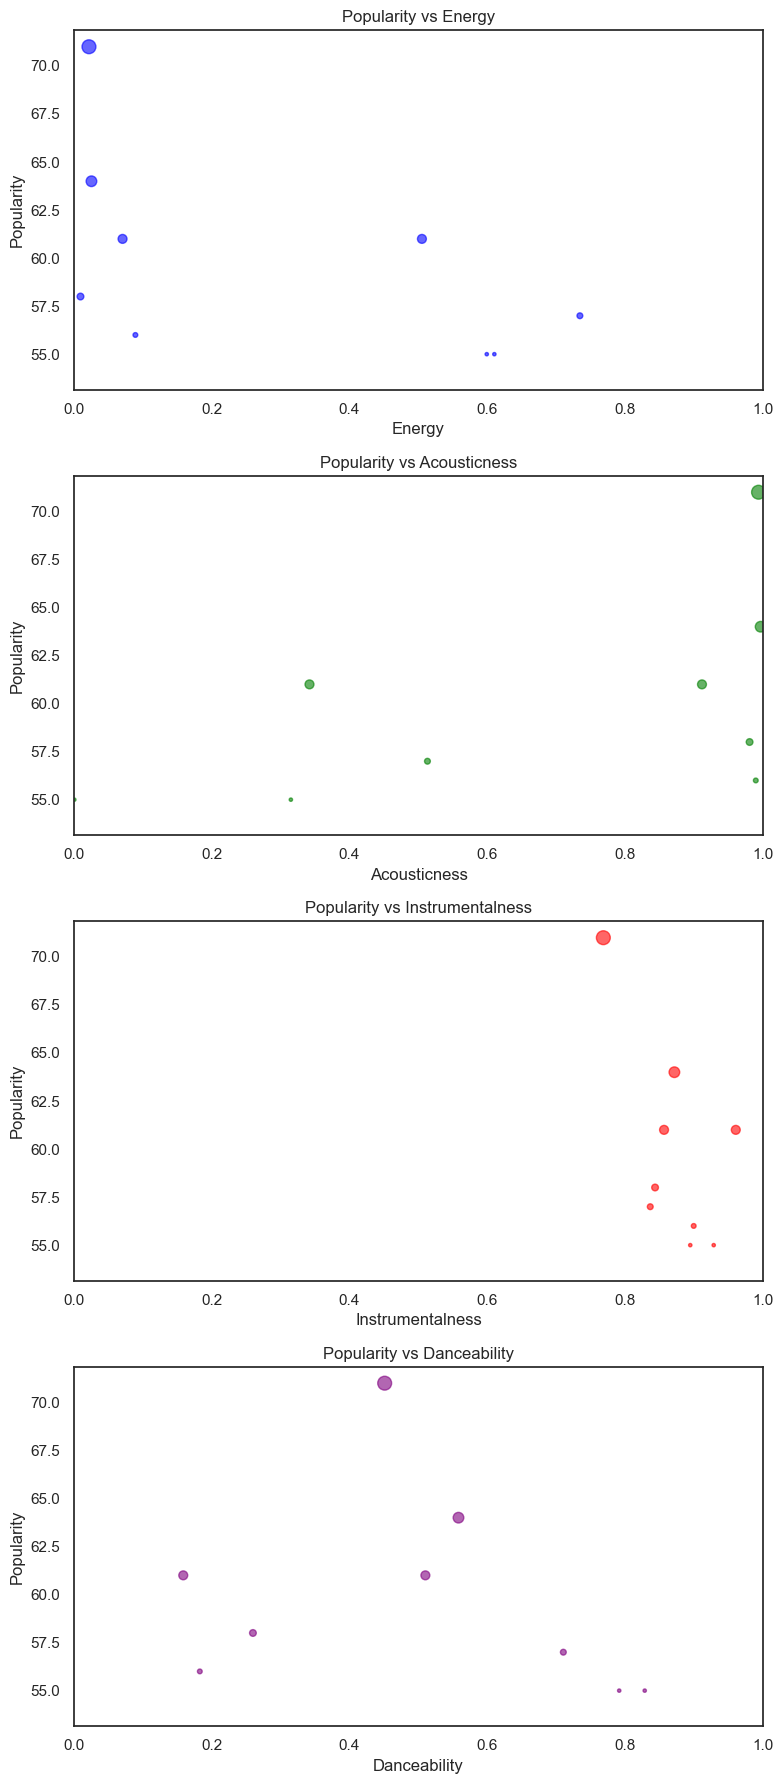

In [35]:
scaler = MinMaxScaler()

# Prepare the data
df_pop = df_sorted.head(10)
X = df_pop[['Energy', 'Acousticness', 'Instrumentalness', 'Danceability']].values
y = df_pop['Popularity'].values

# Scale features
X = scaler.fit_transform(X)

# Fit 
model = LinearRegression()
model.fit(X, y)

# Scaling for dot sizes
popularity_scaled = (y - y.min()) / (y.max() - y.min()) * 100

# Plotting
plt.figure(figsize=(8, 18))

# Energy vs Popularity
plt.subplot(4, 1, 1)
plt.scatter(df_pop['Energy'], y, c='blue', s=popularity_scaled, alpha=0.6)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Popularity vs Energy')
plt.xlim(0, 1)

# Acousticness vs Popularity
plt.subplot(4, 1, 2)
plt.scatter(df_pop['Acousticness'], y, c='green', s=popularity_scaled, alpha=0.6)
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.title('Popularity vs Acousticness')
plt.xlim(0, 1)

# Instrumentalness vs Popularity
plt.subplot(4, 1, 3)
plt.scatter(df_pop['Instrumentalness'], y, c='red', s=popularity_scaled, alpha=0.6)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Popularity vs Instrumentalness')
plt.xlim(0, 1)

# Danceability vs Popularity
plt.subplot(4, 1, 4)
plt.scatter(df_pop['Danceability'], y, c='purple', s=popularity_scaled, alpha=0.6)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Popularity vs Danceability')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()


# Calculating Ambientness

To calculate the Ambientness score, I invert the scales for Energy and Danceability so that lower values have a positive impact. Then, I combine these inverted values with the actual values of Acousticness and Instrumentalness. The final score is weighted to reflect the contribution of each feature to a track's ambient quality, using an intuitive weighting approach similar to how I handled Bangerness.

Ambientness=(0.8×Energy_inverse)+(0.3×Acousticness)+(0.4×Instrumentalness)+(0.1×Danceability_inverse)








In [79]:
# Invert the scales where lower values should contribute positively to Ambientness
df_sorted_unique['Energy_inverse'] = 1 - df_sorted_unique['Energy']
df_sorted_unique['Danceability_inverse'] = 1 - df_sorted_unique['Danceability']

# Calculate the Ambientness score
df_sorted_unique['Ambientness'] = (
    0.8 * df_sorted_unique['Energy_inverse'] +    
    0.3 * df_sorted_unique['Acousticness'] +      
    0.4 * df_sorted_unique['Instrumentalness'] +  
    0.1 * df_sorted_unique['Danceability_inverse'] 
)

# Normalize the Ambientness score to the range [0, 1]
min_ambientness = df_sorted_unique['Ambientness'].min()
max_ambientness = df_sorted_unique['Ambientness'].max()
df_sorted_unique['Ambientness'] = (df_sorted_unique['Ambientness'] - min_ambientness) / (max_ambientness - min_ambientness)

# Display the DataFrame with the new Ambientness column
df_sorted_unique[['Track Name', 'Energy', 'Acousticness', 'Instrumentalness', 
                  'Danceability', 'Ambientness']].head(20)

# Sort by Ambientness and display the top tracks
df_amb = df_sorted_unique.sort_values(['Ambientness'], ascending=False)
df_amb[['Album Name', 'Track Name', 'Popularity', 'Energy', 'Acousticness', 'Instrumentalness', 
       'Danceability', 'Bangerness', 'Valence', 'Ambientness']].head(10)


,Album Name,Track Name,Popularity,Energy,Acousticness,Instrumentalness,Danceability,Bangerness,Valence,Ambientness
87,Selected Ambient Works Volume II,#7,43,0.03330,0.994,0.981,0.161,0.016226,0.0481,1.000000
94,Selected Ambient Works Volume II,#14,35,0.02960,0.992,0.946,0.124,0.000628,0.0377,0.994377
45,Drukqs,Petiatil Cx Htdui,43,0.00682,0.996,0.956,0.421,0.109923,0.1390,0.989933
41,Drukqs,Bit 4,5,0.02320,0.972,0.930,0.181,0.128393,0.0000,0.985185
26,Drukqs,Strotha Tynhe,38,0.00250,0.990,0.894,0.384,0.151476,0.0373,0.976163
100,Selected Ambient Works Volume II,#20,51,0.04190,0.971,0.909,0.108,0.041007,0.0429,0.973599
90,Selected Ambient Works Volume II,#10,33,0.04720,0.974,0.905,0.105,0.000000,0.0201,0.970313
86,Selected Ambient Works Volume II,#6,35,0.07740,0.995,0.979,0.226,0.038044,0.0675,0.970058
21,Syro,aisatsana [102],58,0.01000,0.980,0.843,0.260,0.258259,0.0349,0.964124
43,Drukqs,Father,30,0.03210,0.990,0.951,0.698,0.249236,0.2030,0.953303


Mean Squared Error: 0.007487741439444308
R² Score: 0.9077888982929381


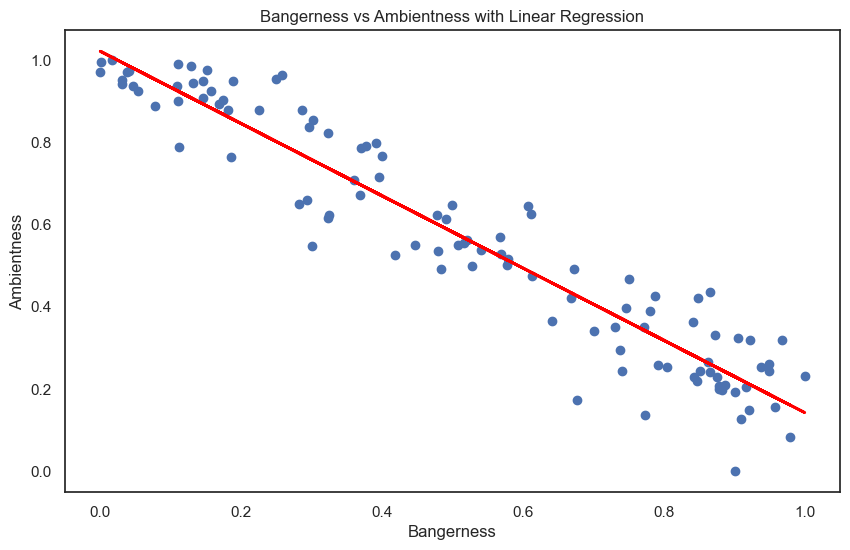

In [80]:
# Prepare the data
X = df_amb['Bangerness'].values.reshape(-1, 1)  
y = df_amb['Ambientness'].values 

# Fit 
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Evaluate 
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot 
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Bangerness')
plt.ylabel('Ambientness')
plt.title('Bangerness vs Ambientness with Linear Regression')
plt.show()

The linear regression analysis between Bangerness and Ambientness shows an R² score of 0.9, meaning there's a strong link between them. The Mean Squared Error of 0.007 shows that the model's predictions are quite accurate. This tells us that Bangerness does a good job of predicting Ambientness, and the model captures most of the variation in Ambientness based on Bangerness.

# Where Bangerness Meets Ambientness

Finally, I couldn’t help but wonder what happens when Bangerness and Ambientness come together. I filtered the tracks to find those where the two scores are within 4% of each other. [Here is a playlist with tracks that hit this balance]():

This final step shows tracks where Bangerness and Ambientness are closely aligned, and I find that the results really make sense.

In [77]:
df_fin = df_amb[['Album Name', 'Track Name', 'Popularity', 'Energy', 'Danceability', 'Acousticness', 'Instrumentalness', 
                 'Speechiness', 'Liveness', 'Valence', 'Bangerness', 'Ambientness']]

# Look for tracks with 5% or less difference between Bangerness and Ambientness
df_fin_filtered = df_fin[
    (df_fin['Bangerness'] - df_fin['Ambientness']).abs() < 0.05
]

df_fin_filtered

,Album Name,Track Name,Popularity,Energy,Danceability,Acousticness,Instrumentalness,Speechiness,Liveness,Valence,Bangerness,Ambientness
28,Drukqs,Bbydhyonchord,43,0.447,0.804,0.666000,0.960,0.0938,0.1430,0.8830,0.607540,0.644451
62,Richard D. James Album,Fingerbib,51,0.564,0.619,0.871000,0.926,0.0293,0.1600,0.7870,0.612067,0.625189
113,Selected Ambient Works 85-92,Schottkey 7th Path,43,0.656,0.620,0.805000,0.964,0.0348,0.0775,0.0704,0.567930,0.569738
105,Selected Ambient Works 85-92,Xtal,61,0.505,0.510,0.342000,0.960,0.0344,0.1170,0.3180,0.521199,0.563577
33,Drukqs,Orban Eq Trx 4,32,0.275,0.776,0.000006,0.795,0.0584,0.1030,0.2690,0.516815,0.555647
107,Selected Ambient Works 85-92,Pulsewidth,54,0.486,0.765,0.420000,0.876,0.0724,0.3320,0.3030,0.507184,0.549059
111,Selected Ambient Works 85-92,Heliosphan,50,0.612,0.345,0.455000,0.956,0.0416,0.0854,0.1260,0.541024,0.537516
76,...I Care Because You Do,Wet Tip Hen Ax,28,0.416,0.677,0.103000,0.879,0.0323,0.1240,0.0919,0.569185,0.528451
58,Come To Daddy,IZ-US,52,0.459,0.581,0.039800,0.881,0.0314,0.1510,0.3160,0.527848,0.498028
92,Selected Ambient Works Volume II,#12,31,0.482,0.234,0.000279,0.850,0.1480,0.1690,0.1720,0.483278,0.492393


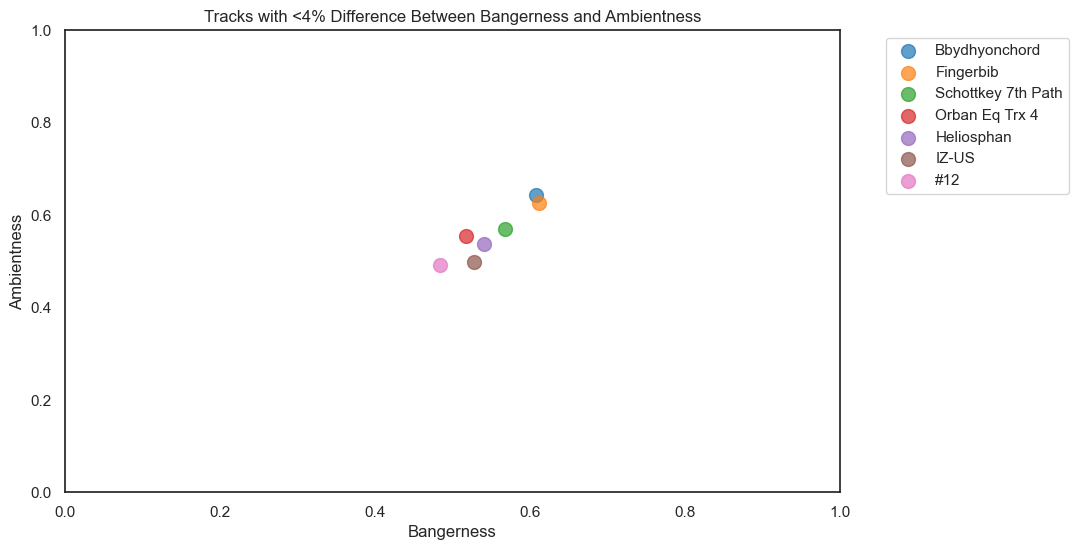

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter tracks with 4% or less difference between Bangerness and Ambientness
df_fin_filtered = df_fin[
    (df_fin['Bangerness'] - df_fin['Ambientness']).abs() < 0.04
]

# Set color palette
colors = sns.color_palette('tab10', len(df_fin_filtered))

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot each track with a different color
for i, track_name in enumerate(df_fin_filtered['Track Name']):
    plt.scatter(
        df_fin_filtered['Bangerness'].iloc[i],
        df_fin_filtered['Ambientness'].iloc[i],
        color=colors[i],
        label=track_name,
        s=100,  # Marker size
        alpha=0.7
    )

# Add labels and title
plt.xlabel('Bangerness')
plt.ylabel('Ambientness')
plt.title('Tracks with <4% Difference Between Bangerness and Ambientness')

# Set axis limits to [0, 1]
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add legend with track names
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
